In [1]:
# %load mysettings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

np.set_printoptions(precision=4, suppress=True)

pd.options.display.max_rows = 15
pd.options.display.precision=4

mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 9

%matplotlib inline

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

In [27]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


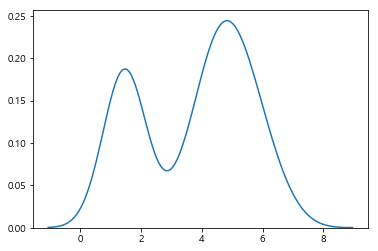

In [3]:
x = iris.petal_length.values
sns.kdeplot(x);

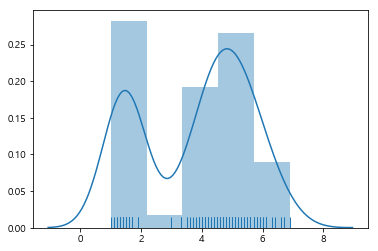

In [4]:
sns.distplot(x, kde=True, rug=True);

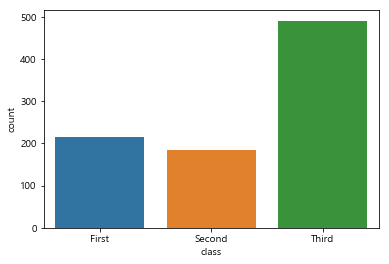

In [5]:
sns.countplot(x="class", data=titanic);

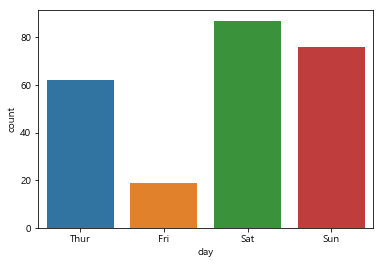

In [6]:
sns.countplot(x="day", data=tips);

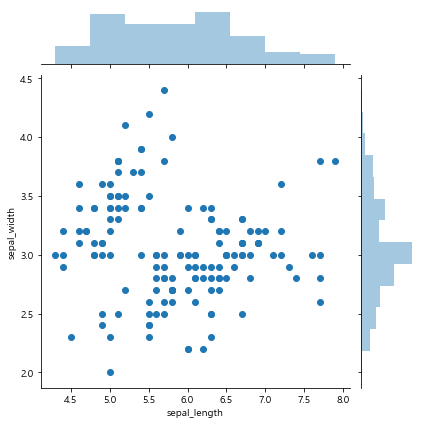

In [7]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris);

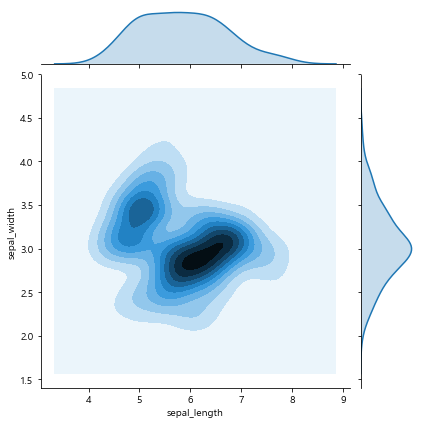

In [8]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde");

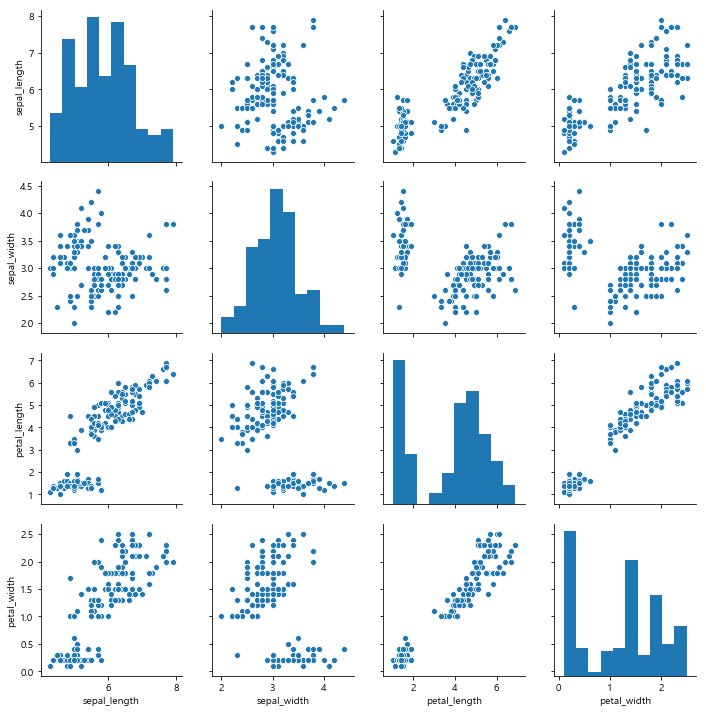

In [9]:
sns.pairplot(iris);

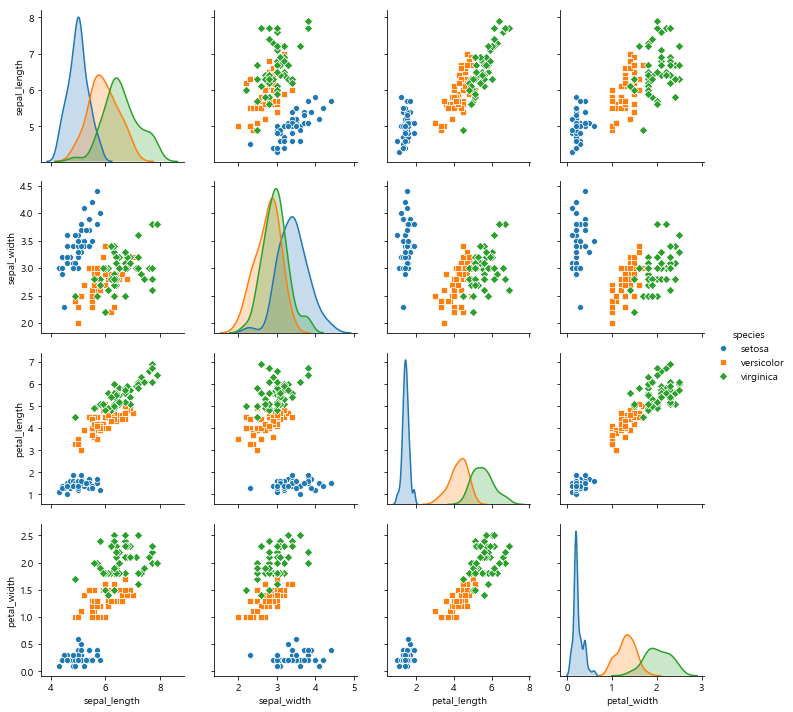

In [10]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"]);

In [11]:
titanic_size = titanic.pivot_table(index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


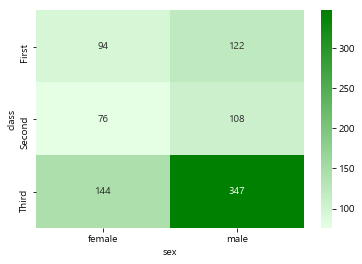

In [12]:
sns.heatmap(titanic_size, cmap=sns.light_palette("green", as_cmap=True), 
            annot=True, fmt="d");

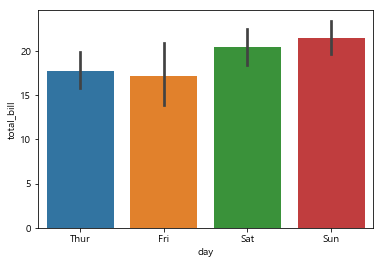

In [13]:
sns.barplot(x="day", y="total_bill", data=tips);

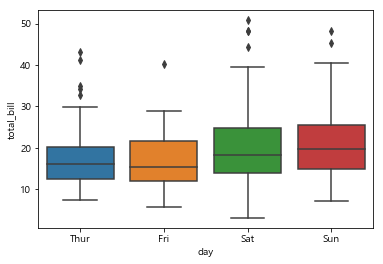

In [14]:
sns.boxplot(x="day", y="total_bill", data=tips);

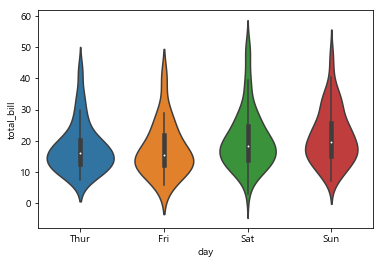

In [15]:
sns.violinplot(x="day", y="total_bill", data=tips);

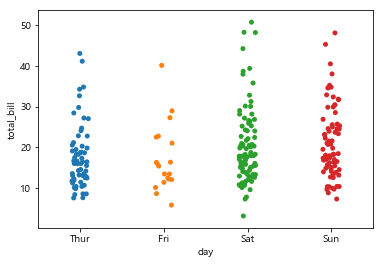

In [30]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

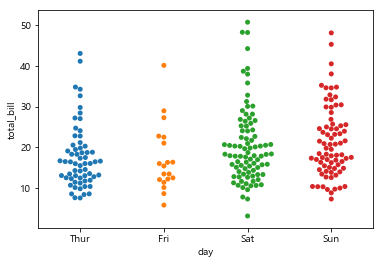

In [17]:
sns.swarmplot(x="day", y="total_bill", data=tips);

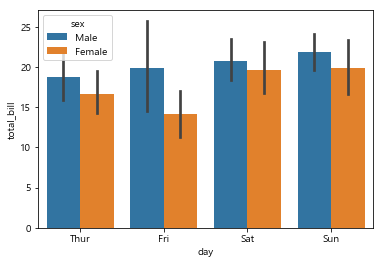

In [18]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips);

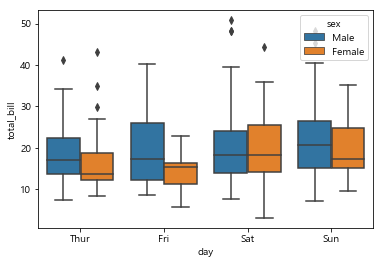

In [19]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);

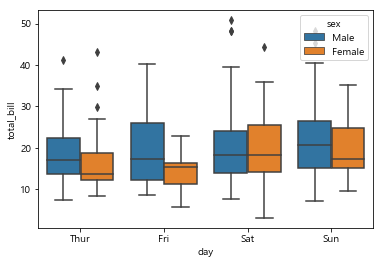

In [20]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);

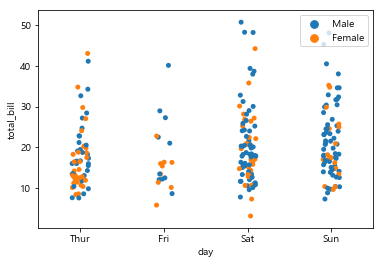

In [21]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.legend(loc=1);
# Location String   Location Code
# ===============   =============
# 'best'            0
# 'upper right'     1
# 'upper left'      2
# 'lower left'      3
# 'lower right'     4
# 'right'           5
# 'center left'     6
# 'center right'    7
# 'lower center'    8
# 'upper center'    9
# 'center'          10
# ===============   =============

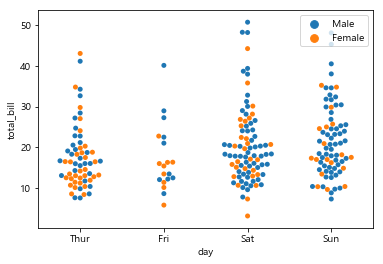

In [22]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.legend(loc=1);

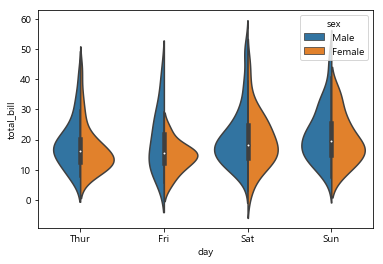

In [23]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

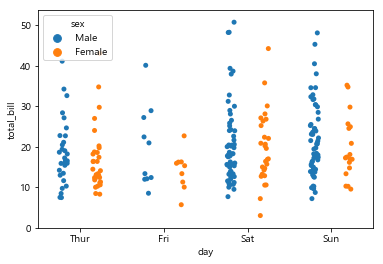

In [24]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True);

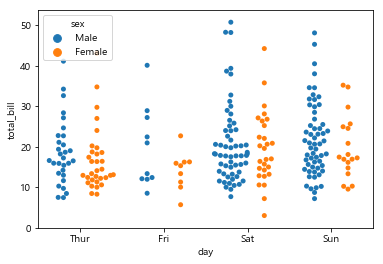

In [25]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True);

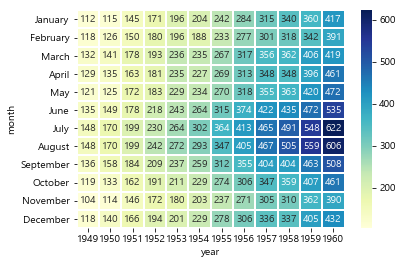

In [32]:
flights_passengers = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_passengers, cmap="YlGnBu", annot=True, fmt="d", linewidths=1);

In [37]:
data = pd.read_csv("stock_px.csv", index_col=0, parse_dates=True)
data.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [41]:
returns = data.iloc[:, :-2].pct_change()
returns.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP
1990-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-02,0.0120,0.0178,0.0000,0.0060,0.0234,0.0,0.0083
1990-02-05,0.0060,0.0225,0.0000,0.0255,-0.0069,0.0,-0.0066
1990-02-06,-0.0118,-0.0073,0.0035,0.0139,-0.0046,0.0,0.0165
1990-02-07,0.0060,-0.0431,0.0104,0.0211,0.0139,0.0,0.0033


In [42]:
returns.corr()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP
AA,1.0000,0.2169,0.4542,0.3208,0.2393,0.3323,0.2310
AAPL,0.2169,1.0000,0.3093,0.3531,0.1534,0.3659,0.1300
GE,0.4542,0.3093,1.0000,0.4136,0.3748,0.4150,0.3321
IBM,0.3208,0.3531,0.4136,1.0000,0.2470,0.4261,0.2158
JNJ,0.2393,0.1534,0.3748,0.2470,1.0000,0.2921,0.3723
MSFT,0.3323,0.3659,0.4150,0.4261,0.2921,1.0000,0.2493
PEP,0.2310,0.1300,0.3321,0.2158,0.3723,0.2493,1.0000


In [50]:
returns.corrwith(returns["AAPL"]).sort_values()

PEP     0.1300
JNJ     0.1534
AA      0.2169
GE      0.3093
IBM     0.3531
MSFT    0.3659
AAPL    1.0000
dtype: float64

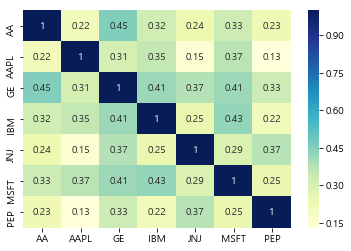

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(returns.corr(), annot=True, cmap="YlGnBu");